Import the Relevant Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data_raw=pd.read_csv('iris.csv')
data=data_raw.copy()

In [3]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
data.rename(columns={'5.1':'sepal_length','3.5':'sepal_width','1.4':'petal_length','0.2':'petal_width','Iris-setosa':'species'},inplace=True)

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


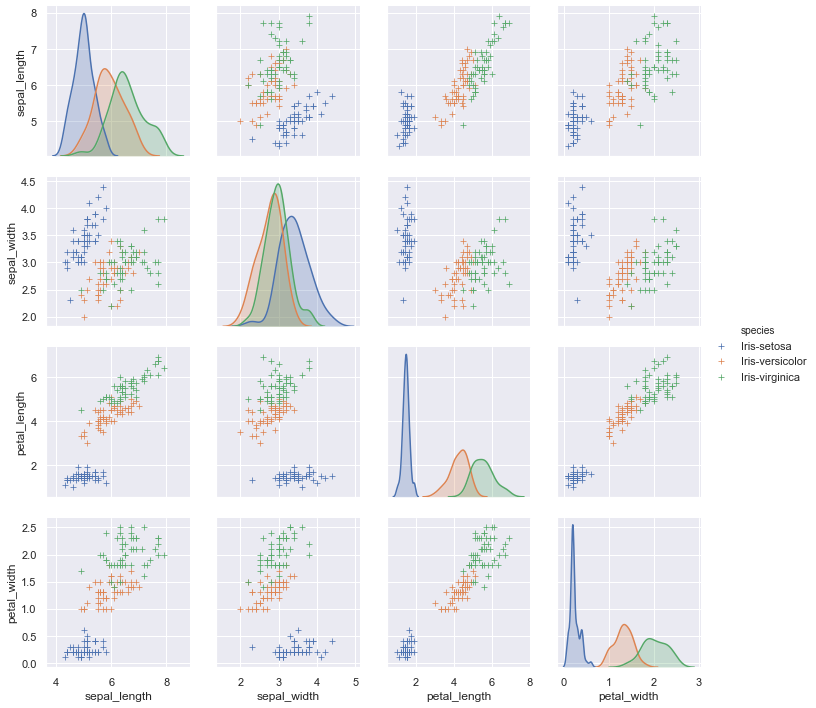

In [6]:
g = sns.pairplot(data, hue='species', markers='+')
plt.show()

#### Looking at the above plots,it is clear that the relationship between the pair of features is distictly different for Iris_setosa(blue) from other two species while as there is some overlap in pariwise relationship of other two species.

In [7]:
data.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,149.000000,149.000000,149.000000,149.000000,149
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.848322,3.051007,3.774497,1.205369,NaN
std,0.828594,0.433499,1.759651,0.761292,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.400000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


#### Creating the inputs and Targets

In [8]:
targets=data['species']
inputs=data.drop('species',axis=1)

##### Split the data into train and test set and shuffle 

In [9]:
x_train,x_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.15,random_state=42)

Logistic Regression with sklearn

In [10]:
reg=LogisticRegression() #create a Logistic Regression object
reg.fit(x_train,y_train) #fitting the model using inputs and targets

C:\Users\rajaw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rajaw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
pred_outputs=reg.predict(x_train)  #outputs predicted by our model

In [12]:
reg.score(x_train,y_train),reg.score(x_test,y_test)  #Training and test accuracy of the model

(0.9761904761904762, 0.9130434782608695)

(Training Accuracy=97.6%,Test Accuracy=91.3%)